In [1]:
'''
Reading basic data from iphone inputs
'''

'\nReading basic data from iphone inputs\n'

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import datetime
import os
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import string
# import pymc as pm


In [53]:
file_name = '../../data/iphone_responses/backend_patientresponse.csv'
dtypes = [int, datetime, string, datetime, string, int, int]

In [54]:
df = pd.read_csv(file_name, parse_dates=['workday', 'date'])
#start on August 1st
# df = df[478:]
df = df[3329:]
#get rid of admin users
# admin_list = ['admin', 'anna', 'john', 'memorial', 'nm175316', '[mbechel']
admin_list= [2,3,4,5,7,8]
df = df[~df.user_id.isin(admin_list)]
df

,id,question_id,workday,response,date,patient_id,checklist_id,user_id
3329,3342,$0702,2016-11-04,NaN,2016-11-04 19:15:55,283901f7a13a26921992f792ea4d8e51718559f1,3,20
3330,3343,$0601,2016-11-04,NaN,2016-11-04 19:16:15,283901f7a13a26921992f792ea4d8e51718559f1,3,20
3331,3344,$0101,2016-11-04,NaN,2016-11-04 19:18:27,2d7a839e4647e9d42c99ade0de9a5839c4c4071b,3,20
3332,3345,$0201,2016-11-04,NaN,2016-11-04 19:18:24,2d7a839e4647e9d42c99ade0de9a5839c4c4071b,3,20
3334,3347,$0101,2016-11-09,NaN,2016-11-09 18:00:04,dd77950cf9b6c755fe12ea4d32d50502589448a8,3,20
3335,3348,$0201,2016-11-09,NaN,2016-11-09 17:59:58,dd77950cf9b6c755fe12ea4d32d50502589448a8,3,20
3336,3349,$0101,2016-11-09,N,2016-11-09 18:10:20,2d2824a8dc998bae7682707cc706891a3c36018b,3,20
3337,3350,$0102,2016-11-09,N,2016-11-09 18:10:31,2d2824a8dc998bae7682707cc706891a3c36018b,3,20
3338,3351,$0201,2016-11-09,Y,2016-11-09 18:10:33,2d2824a8dc998bae7682707cc706891a3c36018b,3,20
3339,3352,$0202,2016-11-09,N,2016-11-09 18:10:36,2d2824a8dc998bae7682707cc706891a3c36018b,3,20


### For each question, how much are NA?

What is the ratio of answers for each question?

In [55]:
question_id = df.question_id.unique().tolist()

In [56]:
df_ex = df.groupby(['question_id', 'response'])['response'].count().unstack('response')


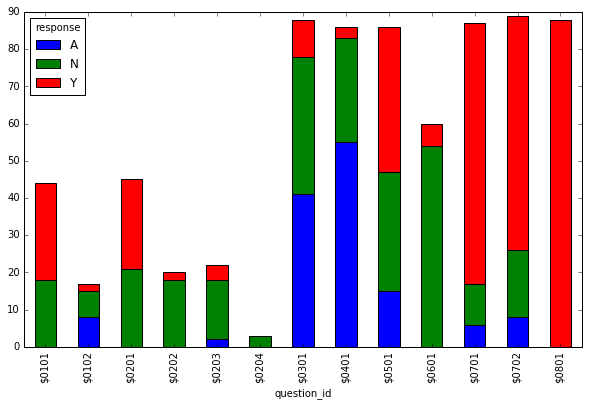

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
df_ex.plot(kind='bar', stacked=True, ax=ax)

### For each user, how much are NA? 

In [51]:
df_ex = df.groupby(['user_id', 'response'])['response'].count().unstack('response')

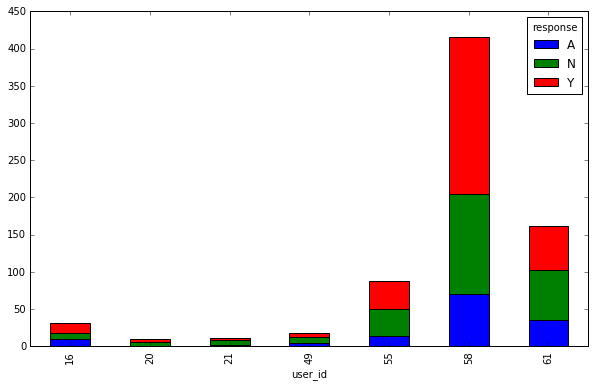

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
df_ex.plot(kind='bar', stacked=True, ax=ax)

### For each 'session' how much are NA?